# Análisis de las carpetas de investigación de la FGJ

# Introducción

Este notebook tiene como objetivo realizar un análisis detallado de la base de datos de **Carpetas de Investigación de la Fiscalía General de Justicia (FGJ) de la Ciudad de México**. La base de datos utilizada fue obtenida del portal de **Datos Abiertos del Gobierno de la Ciudad de México** y está disponible en
 (https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico).

La base de datos contiene información actualizada sobre las carpetas de investigación de delitos a nivel de calle registradas por la FGJ a partir de enero de 2016. Las variables incluidas en esta base de datos permiten un análisis exhaustivo de los delitos y sus características, facilitando la identificación de patrones y tendencias.

Las principales variables que se encuentran en esta base de datos son:
- **Carpetas de investigación** de delitos.
- **Fiscalía, Agencia y Unidad de Investigación** responsables de la carpeta.
- **Fecha de apertura** de la carpeta de investigación.
- **Delito** y **categoría de delito**.
- Información geográfica: **calle**, **colonia**, **alcaldía** y **coordenadas**.
- **Mes** y **año** de la investigación.

A lo largo de este análisis, se abordarán diversas técnicas de exploración y visualización de datos para interpretar y comprender la distribución de los delitos en la Ciudad de México, así como su evolución temporal.

## Instalación de librerías

En primer lugar, importamos las librerías necesarias para llevar a cabo los análisis correspondientes, tales como **pandas** para la manipulación y análisis de datos, **matplotlib** y **seaborn** para la visualización gráfica, y **numpy** para operaciones numéricas. A continuación, cargamos el archivo CSV que contiene los datos de las carpetas de investigación, el cual será la base para realizar la exploración y análisis del comportamiento de los delitos registrados por la Fiscalía General de Justicia (FGJ) de la Ciudad de México.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder
import datetime
le = LabelEncoder()

In [4]:
bd = pd.read_csv('delitosFGJ.csv',parse_dates=["fecha_hecho", "fecha_inicio"])

<ipython-input-4-68ce02287c12>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  bd = pd.read_csv('delitosFGJ.csv',parse_dates=["fecha_hecho", "fecha_inicio"])


# Análisis exploratorio

En esta sección, realizaremos un análisis exploratorio de los datos contenidos en la base de carpetas de investigación. El objetivo es comprender la estructura general de la base, examinar las características de las variables, identificar posibles valores faltantes o inconsistencias, y obtener una visión preliminar de las tendencias y patrones en los delitos registrados. Para ello, se explorarán aspectos como la distribución temporal de las carpetas, la incidencia por tipo de delito, la distribución geográfica de los mismos, así como cualquier otro comportamiento relevante que pueda ayudar a generar hipótesis o preguntas para un análisis más profundo.

In [82]:
# Listas con etiquetas de fechas a utilizar posteriormente
dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre",
      "Noviembre", "Diciembre"]

La base de datos contiene un total de **1,027,732 registros**, cada uno correspondiente a una carpeta de investigación. Entre las variables clave se encuentra la **fecha en que se provocó el delito** (fecha_hecho), la **fecha de apertura de la carpeta de investigación** (fecha_inicio), la **hora**, y las **coordenadas geográficas** (longitud y latitud) del incidente. Aunque algunos registros contienen valores nulos en estas variables, la mayoría de los datos permiten realizar un análisis detallado. Además, se incluye el **tipo de delito** cometido, su **categoría**, y la **colonia** donde ocurrió el hecho, lo que facilita el análisis de la distribución espacial y tipológica de los delitos. A continuación, mostramos 5 registros de la base de datos.

In [9]:
bd.loc[:,['fecha_inicio','fecha_hecho','delito','hora_hecho', 'latitud', 'longitud']].head(5)

,fecha_inicio,fecha_hecho,delito,hora_hecho,latitud,longitud
0,2020-01-02,2020-01-02,DESPOJO,01:30:00,19.40095,-99.17582
1,2020-01-02,2020-01-02,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,02:35:00,19.29057,-99.12875
2,2020-01-02,2020-01-02,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,02:20:00,19.31663,-99.05980
3,2020-01-02,2020-01-02,ROBO DE ACCESORIOS DE AUTO,03:38:00,19.37784,-99.04932
4,2020-01-02,2020-01-02,ROBO DE ACCESORIOS DE AUTO,04:28:00,19.38421,-99.14676


A continuación se imprimió las fechas del primer y el último delito registrado en la fiscalía.

In [9]:
fecha = bd.fecha_hecho.min()
print("El delito más antiguo fue el "+dias[fecha.dayofweek]+", "+str(fecha.day)+" de "+mes[fecha.month]+" del "+ str(fecha.year))
fecha = bd.fecha_hecho.max()
print("El delito más reciente fue el "+dias[fecha.dayofweek]+", "+str(fecha.day)+" de "+mes[fecha.month]+" del "+ str(fecha.year))

El delito más antiguo fue el Jueves, 2 de Febrero del 2020
El delito más reciente fue el Miercoles, 31 de Agosto del 2024


Después, se buscó la fecha de la carpeta más antigua abierta en la fiscalía y la más reciente.

In [10]:
fecha = bd.fecha_inicio.min()
print("La caperta de delito más antigua en la base de datos es el "+dias[fecha.dayofweek]+", "+str(fecha.day)+" de "+mes[fecha.month]+" del "+ str(fecha.year))
fecha = bd.fecha_inicio.max()
print("La caperta de delito más reciente en la base de datos es el "+dias[fecha.dayofweek]+", "+str(fecha.day)+" de "+mes[fecha.month]+" del "+ str(fecha.year))

La caperta de delito más antigua en la base de datos es el Jueves, 2 de Febrero del 2020
La caperta de delito más reciente en la base de datos es el Miercoles, 31 de Agosto del 2024


Luego, se creó un gráfico de histograma que muestra la **frecuencia de la cantidad de días** transcurridos entre la **fecha de inicio** y la **fecha en que se provocó el delito** (fecha_hecho) para cada carpeta de investigación. Este gráfico permite visualizar cómo se distribuyen los retrasos o diferencias de tiempo entre la apertura de la carpeta y el momento del delito, lo que puede ser útil para identificar posibles demoras en la apertura de investigaciones o patrones específicos en la velocidad de respuesta de las autoridades.

In [43]:
diff_day = np.array((bd.fecha_inicio-bd.fecha_hecho).values/86400000000000, dtype=int)

Text(0, 0.5, 'Frecuencia')

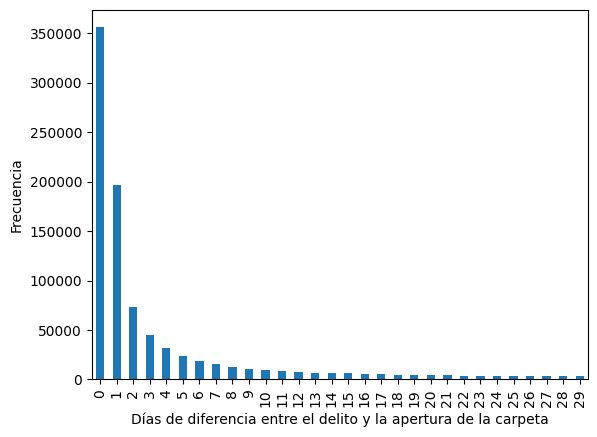

In [65]:
pd.DataFrame(diff_day).value_counts()[:30].plot(kind='bar')
plt.xticks(np.arange(30),np.arange(30))
plt.xlabel('Días de diferencia entre el delito y la apertura de la carpeta')
plt.ylabel('Frecuencia')

## Gráficas de visualización

Para facilitar la visualización y el análisis de los datos, se generaron gráficos que muestran el **top 10 de los delitos más frecuentes** y el **top 10 de las alcaldías con mayor número de registros** de carpetas de investigación. Dado que el conjunto de datos contiene una gran cantidad de registros, se decidió mostrar solo los 10 valores más representativos en cada caso, con el fin de resaltar las tendencias principales. Estos gráficos permiten identificar los delitos más comunes en la Ciudad de México y las alcaldías donde se concentra la mayor actividad delictiva, lo que puede ofrecer una visión más clara sobre las áreas y tipos de delitos más relevantes para un análisis posterior.

Text(0.5, 0, 'Frecuencia de delito')

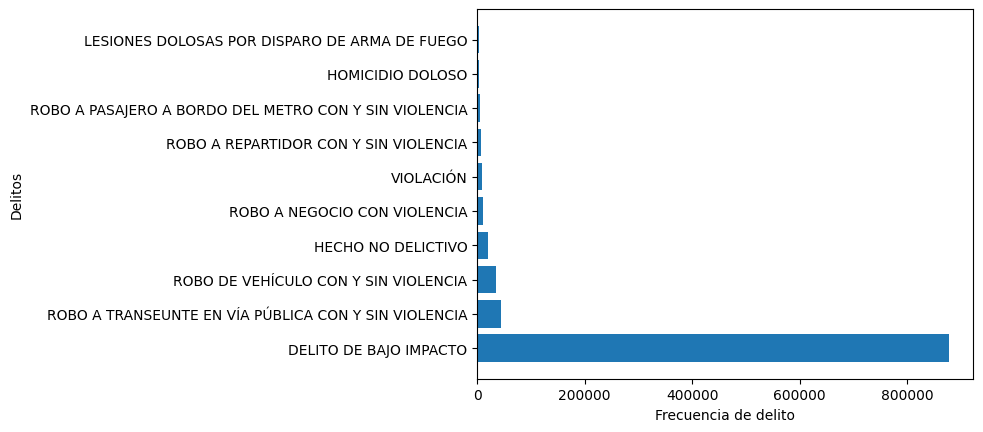

In [76]:
crime_count = bd.categoria_delito.value_counts()
plt.barh(crime_count.index[:10], crime_count.values[:10])
plt.yticks(np.arange(10),crime_count.index[:10],rotation=0)
plt.ylabel('Delitos')
plt.xlabel('Frecuencia de delito')

Text(0.5, 0, 'Frecuencia de delito')

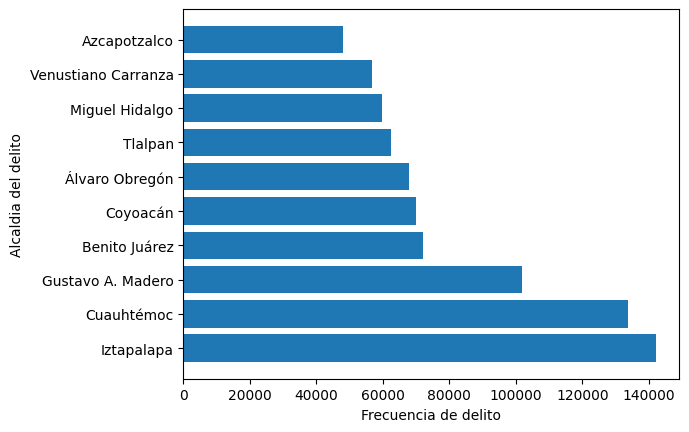

In [78]:
crime_count = bd.alcaldia_catalogo.value_counts()
plt.barh(crime_count.index[:10], crime_count.values[:10])
plt.yticks(np.arange(10),crime_count.index[:10],rotation=0)
plt.ylabel('Alcaldia del delito')
plt.xlabel('Frecuencia de delito')

Se generaron gráficos que muestran los **conteos de delitos distribuidos por día, mes y año** para identificar tendencias temporales en la actividad delictiva. El gráfico diario permite observar la fluctuación de los delitos a lo largo de los días, mientras que el análisis mensual proporciona una visión más amplia de cómo varían los delitos a lo largo del año, identificando posibles picos o caídas en ciertos meses. Finalmente, el gráfico anual muestra la evolución de los delitos a lo largo de los años, permitiendo detectar patrones a largo plazo, como aumentos o disminuciones en la criminalidad. Estos gráficos son útiles para analizar la estacionalidad delictiva y posibles cambios en las dinámicas delictivas a lo largo del tiempo.

Text(0.5, 0, 'Frecuencia de delito')

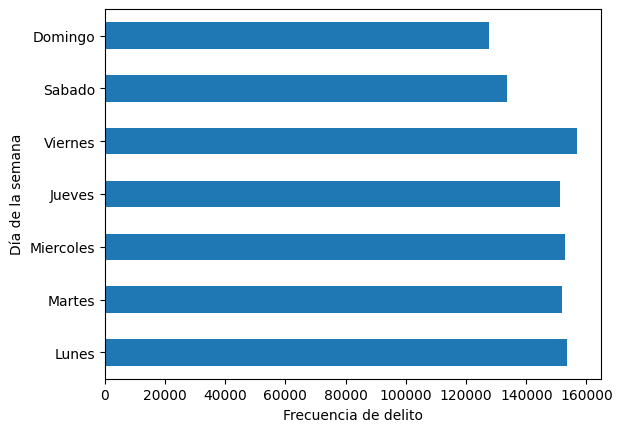

In [85]:
bd.index = bd.fecha_hecho

fecha_count = bd.groupby([bd.index.dayofweek]).size()
fecha_count.plot(kind = 'barh')
plt.yticks(np.arange(7),['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
plt.ylabel('Día de la semana')
plt.xlabel('Frecuencia de delito')

Text(0.5, 0, 'Frecuencia de delito')

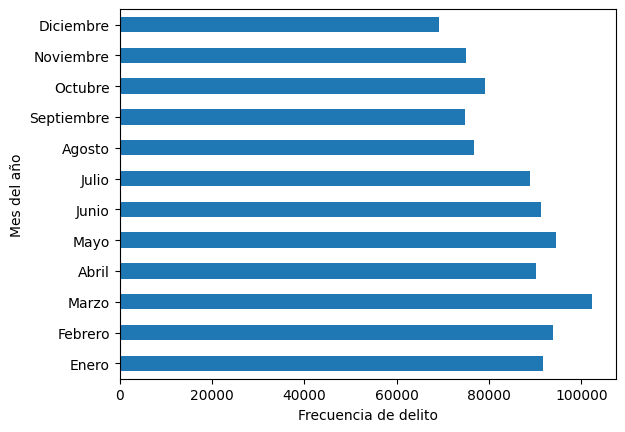

In [86]:
fecha_count = bd.groupby([bd.index.month]).size()
fecha_count.plot(kind = 'barh')
plt.yticks(np.arange(12),mes)
plt.ylabel('Mes del año')
plt.xlabel('Frecuencia de delito')

Text(0.5, 0, 'Frecuencia de delito')

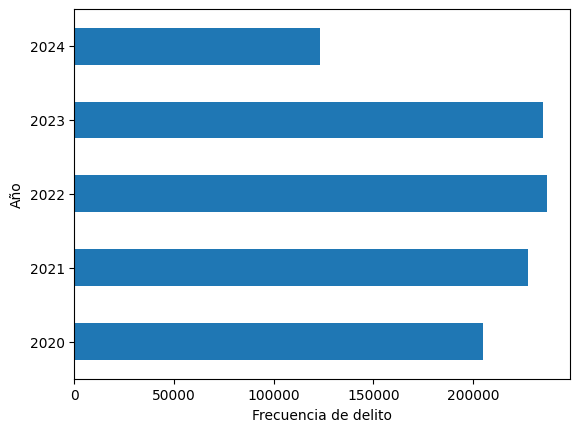

In [87]:
fecha_count = bd.groupby([bd.index.year]).size()
fecha_count.plot(kind = 'barh')
plt.ylabel('Año')
plt.xlabel('Frecuencia de delito')

## Análisis de las carpetas por tipo de delito

In [ ]:
cat_delitos = bd.categoria_delito.unique()

### DELITO DE BAJO IMPACTO

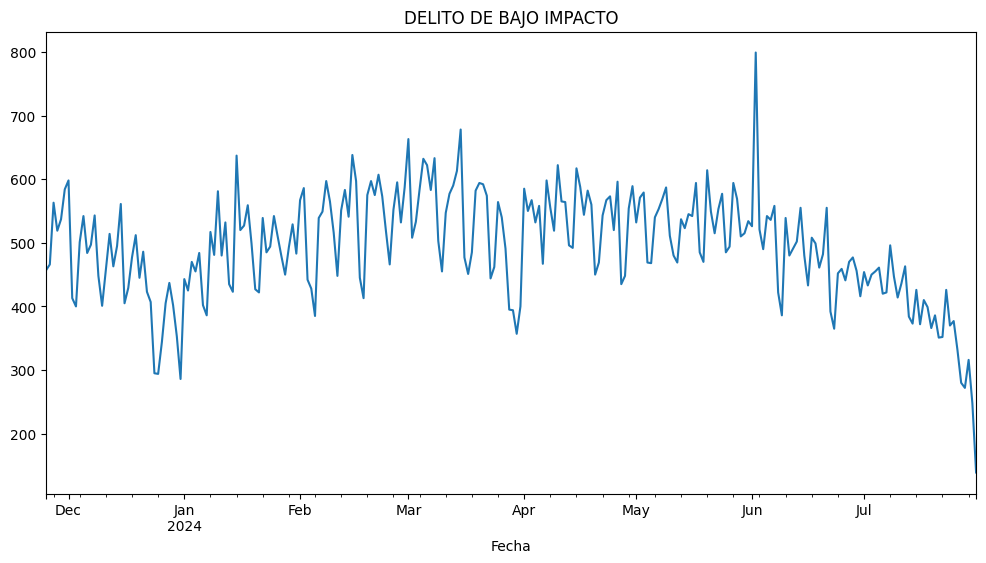

In [102]:
delito = cat_delitos[0]
crimes_new = bd[bd['categoria_delito'] == delito]
crimes_new.groupby([crimes_new.fecha_hecho]).size()[-250:].plot(figsize=(12,6))
plt.title(delito)
plt.xlabel('Fecha')
plt.show()

### LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO

Text(0.5, 1.0, 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO')

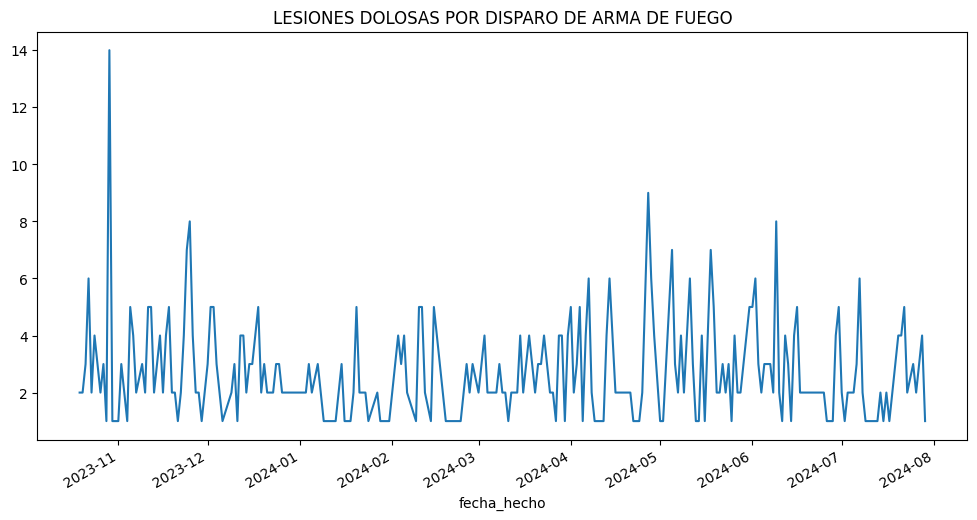

In [97]:
delito = cat_delitos[1]
crimes_new = bd[bd['categoria_delito'] == delito]
crimes_new.groupby([crimes_new.fecha_hecho]).size()[-250:].plot(figsize=(12,6))
plt.title(delito)
plt.xlabel('Fecha')
plt.show()

### HECHO NO DELICTIVO

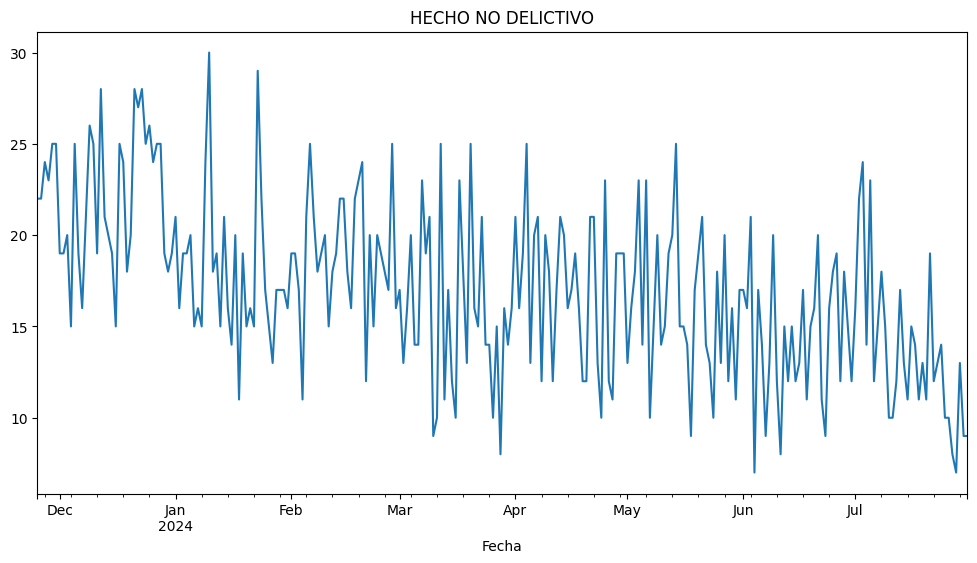

In [103]:
delito = cat_delitos[2]
crimes_new = bd[bd['categoria_delito'] == delito]
crimes_new.groupby([crimes_new.fecha_hecho]).size()[-250:].plot(figsize=(12,6))
plt.title(delito)
plt.xlabel('Fecha')
plt.show()

### ROBO DE VEHÍCULO CON Y SIN VIOLENCIA

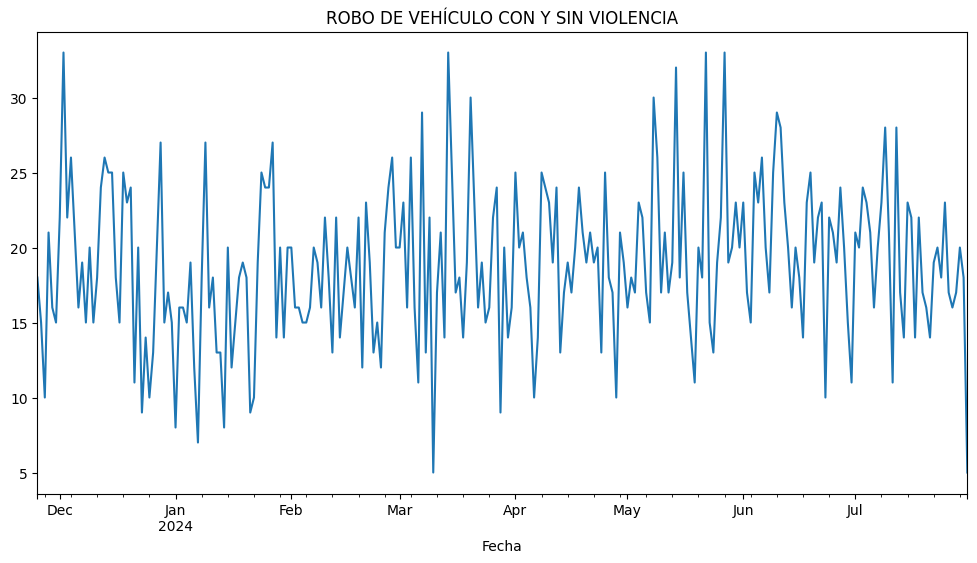

In [106]:
delito = cat_delitos[3]
crimes_new = bd[bd['categoria_delito'] == delito]
crimes_new.groupby([crimes_new.fecha_hecho]).size()[-250:].plot(figsize=(12,6))
plt.title(delito)
plt.xlabel('Fecha')
plt.show()